# Lab 04: Factor analysis 1

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assitant Professor Vrije Universiteit Amsterdam<br>
Statistics and Data Analysis Course

Modified after: Trauth, Martin H., et al. MATLAB recipes for earth sciences. Vol. 34. Berlin: Springer, 2007.


## Learning goals:

* Apply and improve your knowledge of Python and Jupyter
* Get famliar with factor analysis
    * Learn to run a Principle Component Analysis (PCA) in Python
    * Understand and apply tools to assess whether the *variables* in a dataset can be reduced
    * Interpret *scores* and *loadings* and *eigenvalues* of a PCA result
* Develop a feeling for how statistical tools can help you, but you still require *your interpretation* to draw conclusions.

# Introduction
In this lab, we will start working with **Factor analysis**. More specifically, we will apply a technique called **Principle Component Analysis** to a dataset to test whether the information in the data can be *reduced* by finding a small set of *components* which replace the *variables* in the dataset while containing (almost) the same information.

This all sounds quite technical, and that is because it is. **Factor analysis can be a hard concept to wrap your head around**, and it is normal to be confused about it in the beginning. However, it is also a very powerful tool for data reduction, which plays an important role in modern science and in our society as a whole and is used for a surprising number of things!

This is why we spend two labs practicing it. Do not dispair, we will go through this step by step so you will have plenty of time to practice.

We will start by loading the packages we will need. You know how to do this by now, so we will not give you the code any more from now on.

**Exercise 1:** Load the `numpy` package and the `pyplot` package (part of `matplotlib`), import the `stats` package from the `scipy` library and `import` the function `PCA` from the `decomposition` package which is part of `sklearn`.  Don't forget to add the statement you used before to allow plots to be visualized in Jupyter

In [13]:
# Make sure our figures show up in Jupyter
%matplotlib inline
import numpy as np # The 'numpy' package contains some handy functions
from matplotlib import pyplot as plt # The 'matplotlib' package contains tools needed to plot our data and results
from sklearn.decomposition import PCA # Load the PCA function from the decomposition package in sklearn
from scipy import stats

In this lab, we are going to use the same dataset as in *Lab 03*. You know how to load this data by now (if not, have a sneak peak at the previous lab). Don't forget that if you are using Spyder, you need to first define your working directory, and that if you are using Jupyter, you need to move the dataset into the same folder as your notebook.

**Exercise 2:** Load *Lab03.txt* in Python and explore the data to familiarize yourself again with its structure.

In [7]:
data = np.loadtxt('Lab03.txt', skiprows=1) # Load data
print(data) # inspect data

[[0.1702 0.1906 0.3079 0.0941 0.0286 0.     0.0767 0.0577 0.0742]
 [0.1357 0.191  0.2532 0.1248 0.106  0.0275 0.0621 0.0331 0.0665]
 [0.0885 0.1016 0.1791 0.116  0.1185 0.0174 0.1673 0.0789 0.1328]
 [0.0736 0.12   0.1554 0.1269 0.2309 0.0655 0.0916 0.063  0.0731]
 [0.0073 0.0645 0.0737 0.1407 0.2009 0.0278 0.2212 0.0937 0.1701]
 [0.0549 0.0161 0.0626 0.171  0.3922 0.0859 0.1193 0.0376 0.0604]
 [0.0805 0.0465 0.0998 0.1848 0.3848 0.1157 0.0722 0.0157 0.    ]
 [0.2191 0.2266 0.323  0.0877 0.0396 0.     0.0559 0.0317 0.0164]
 [0.1694 0.1608 0.2352 0.1217 0.0983 0.0301 0.0619 0.0599 0.0627]
 [0.2318 0.2116 0.3768 0.102  0.0339 0.007  0.0286 0.001  0.0074]]


If a `print()` of the dataset confuses you, recall again type of data is in this dataset. You should be able to answer the questions below easily if you do.

**Question 1:** What do the *observations* in this dataset represent?

**Answer 1:** They are sediment samples of which the mineral composition is measured

**Question 2:** What do the *variables* in this dataset represent?

**Answer 2:** They represent the minerals of which the concentrations/fractions were measured in each sample.

**Question 3:** What type of information does each datapoint in the dataset contain? What is the unit of this data? What is the minimum and maximum value a datapoint can have?

**Answer 3:** Each datapoint contains the fraction of a sample that contains one of the minerals. The data is unitless and varies between 0 and 1.

Before we dive into factor analysis, it is very important that we recap the structure of the data and explore the correlations between variables we can already observe before doing "fancy" statistics. The easiest way to do this is to create a correlation matrix and to visualize the correlations between the variables in some way. Luckily, you have already learned how to do that in the previous Lab, so you can recycle the code from **Lab03**.

**Exercise 3:** Calculate the correlation matrix for the dataset and plot the correlations using a heatmap (use the `imshow` function)

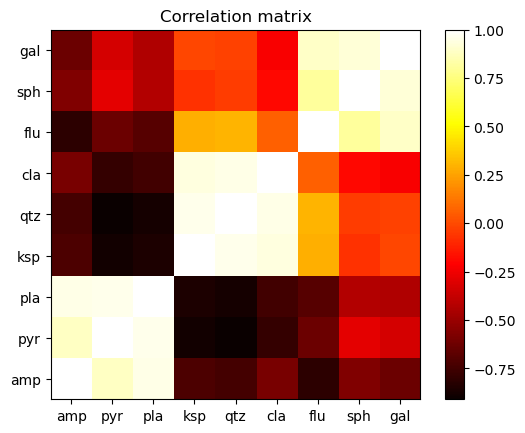

In [8]:
# Create a correlation matrix of the mineral content
corrmatrix = np.corrcoef(data.T)

# Create a vector of variable names (minerals)
minerals = ['amp', 'pyr', 'pla', 'ksp', 'qtz', 'cla', 'flu', 'sph', 'gal']

# Flip the correlation matrix for plotting:
corrmatrix = np.flipud(corrmatrix)

# Plot the correlation matrix with colors representing the degree of correlation:
plt.figure(1)
plt.imshow(corrmatrix, cmap = 'hot')

# Add a title to the graph
plt.title('Correlation matrix')

# Add the mineral labels:
plt.xticks(np.arange(0, 9), [minerals[i] for i in range(9)])
plt.yticks(np.arange(0, 9), [np.flipud(minerals)[i] for i in range(9)])

# Display the colorbar as a legend:
plt.colorbar()

**Question 4:** Which (groups of) minerals are highly correlated to each other?

**Answer 4:** Three groups appear:
1. amp, pyr, pla (magmatic rock)
2. ksp, qtz, cla (sandstone)
3. flu, sph, gal (hydrothermal vein)

This is a typical example of a dataset in which the variables contain a lot of overlap in terms of information. The fact that some variables are so highly correlated shows us that they teach us (almost) the same thing about our samples. From a statistical and data science point of view, this is very **inefficient**! We can likely **summarize the information contained in this dataset using a small number of more smartly chosen variables**. This is the goal of factor analysis. Let's get started!

We will use the `PCA` function to perform a Principle Component Analysis on our dataset.

**Exercise 4:** First, have a look at the `PCA` function using the `help()` function

In [9]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |
 |  Principal component analysis (PCA).
 |
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |
 |  For a usa

OK, that is a lot of information. Don't worry, you don't need to understand all the options you have with this function. Sometimes, it is easier to look at the `help()` for a function online. The `help`-generated webpage for a function contains the same information as you have just exported using the `help()` function, but it is nicely formatted and easier to read. [This is the help page for the `PCA` function](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) 

What you need to keep in mind is that the syntax (the way you call the function in Python) is a bit different from what you are used to so far. It works as follows: First you create an object that contains the settings you want for your PCA. Then you `fit` that object on your data to get PCA results. We'll go through it step by step below:

In [10]:
pca = PCA() # We first call the PCA function to create our PCA object

Note that we did not specify any settings for our PCA, which means we are using the default settings. You can find out what these are in the `help()` documentation. If you run a PCA, always make sure your data is normalized. You can do this with the `zscore` function from the `stats` package.

In [15]:
data = stats.zscore(data, axis=0) # Normalize dataset, resulting in equal variance for all minerals

scores = pca.fit_transform(data) # Now we apply the new pca object to our data to get our PCA scores
print(scores) # Examine the scores

[[ 2.09244342e+00 -1.11140378e+00  2.06824629e-01 -7.45249829e-02
   5.73799386e-02 -1.53853667e-01 -2.59734856e-02  1.15078232e-01
  -1.70780125e-06]
 [ 1.13019352e+00  2.12428841e-01  2.99476891e-03  7.02923688e-01
  -3.45288539e-02  4.88354734e-02  1.02214854e-01 -2.09532163e-02
  -2.32051486e-06]
 [-8.88636749e-01 -2.21392601e+00 -2.26466533e-01 -1.92652543e-01
   7.77572162e-02 -1.21831713e-01 -1.27935825e-01 -7.54400553e-02
  -2.97512537e-06]
 [-1.08696894e+00  2.29289691e-02  7.83288749e-01  3.14919820e-02
  -3.94926091e-01 -1.46403350e-01 -3.67664985e-02 -2.59514989e-02
   1.92373648e-06]
 [-3.11505212e+00 -2.83382537e+00 -3.72205203e-01  1.38904094e-01
  -4.25815816e-02  1.75469160e-01 -1.60994573e-02  3.61294750e-02
   2.58603453e-06]
 [-3.24522263e+00  1.48556228e+00 -2.94982679e-01 -2.20768172e-01
   3.35722996e-02 -1.45964657e-01  2.53439982e-01  4.35652556e-03
  -3.34660099e-07]
 [-2.55674906e+00  3.27759900e+00  1.89379585e-04  4.52651997e-03
   5.52745678e-02  1.3289050

The *scores* give you the values for each *principle component* for each sample. Remember that the *principle components* can be regarded as the "new *variables*". The *loadings* of the PCA are stored in the variable `pca.components_`:

In [16]:
print(pca.components_)

[[ 0.39981814  0.40393515  0.41328052 -0.35541829 -0.36321529 -0.31011799
  -0.29299042 -0.17388048 -0.18889834]
 [ 0.12374947 -0.0711659  -0.00480676  0.28347325  0.27961707  0.37768142
  -0.39164859 -0.50682638 -0.51783273]
 [-0.04992225  0.241287   -0.11632552 -0.1393061   0.02397632  0.39891758
  -0.53798401  0.67275408 -0.06793806]
 [-0.44246546  0.47531427  0.0824195   0.40566836 -0.20651375  0.05952048
  -0.25514758 -0.29061539  0.45955703]
 [ 0.52211188 -0.34078784  0.05473648  0.60977779 -0.2888132  -0.11025189
  -0.21448274  0.22237241  0.21311245]
 [ 0.15295783  0.553442   -0.42874944  0.36177306 -0.12123614 -0.11193369
   0.37534202  0.14321081 -0.40863394]
 [ 0.13610407  0.09041065 -0.45108481 -0.06561472  0.50749126 -0.5590864
  -0.37655524 -0.07964855  0.21738464]
 [-0.45415356 -0.09667787  0.42665066  0.28774121  0.16597912 -0.48185097
  -0.10530262  0.28886446 -0.40658504]
 [-0.32524901 -0.32813663 -0.48633429 -0.13978107 -0.60287515 -0.17047891
  -0.2578254  -0.126853

In order to obtain a matrix in which columns represent the principal component *loadings* in descending order of explained variability, we need to transpose the `pca.components_` variable:

In [17]:
loadings = np.transpose(pca.components_) # Create a new object with loadings in columns ordered from highest to least amount of explained variance.
print(loadings) # Examine the result

[[ 0.39981814  0.12374947 -0.04992225 -0.44246546  0.52211188  0.15295783
   0.13610407 -0.45415356 -0.32524901]
 [ 0.40393515 -0.0711659   0.241287    0.47531427 -0.34078784  0.553442
   0.09041065 -0.09667787 -0.32813663]
 [ 0.41328052 -0.00480676 -0.11632552  0.0824195   0.05473648 -0.42874944
  -0.45108481  0.42665066 -0.48633429]
 [-0.35541829  0.28347325 -0.1393061   0.40566836  0.60977779  0.36177306
  -0.06561472  0.28774121 -0.13978107]
 [-0.36321529  0.27961707  0.02397632 -0.20651375 -0.2888132  -0.12123614
   0.50749126  0.16597912 -0.60287515]
 [-0.31011799  0.37768142  0.39891758  0.05952048 -0.11025189 -0.11193369
  -0.5590864  -0.48185097 -0.17047891]
 [-0.29299042 -0.39164859 -0.53798401 -0.25514758 -0.21448274  0.37534202
  -0.37655524 -0.10530262 -0.2578254 ]
 [-0.17388048 -0.50682638  0.67275408 -0.29061539  0.22237241  0.14321081
  -0.07964855  0.28886446 -0.12685364]
 [-0.18889834 -0.51783273 -0.06793806  0.45955703  0.21311245 -0.40863394
   0.21738464 -0.4065850

**Question 5:** What type of information can you get from the loadings of your PCA? How can you interpret them?

**Answer 5:** The loadings tell you how important each *variable* in the original dataset "weighs" (or "loads") on each of the new *principle components*. In other words: They tell you how influential each *variable* is for that *component*.

Let’s plot the loadings of the first principal component. In the code below, note that we use the first column of the `loadings` matrix (`loadings[:, 0]`) to isolate the loadings for the first principle component.

Text(0.5, 1.0, 'PC 1')

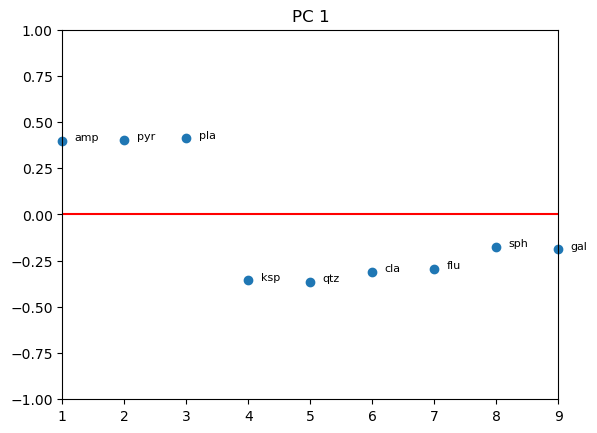

In [18]:
a = np.arange(1,10) # Create a vector with numbers for the variables
plt.figure(2)
plt.plot(a, loadings[:, 0], 'o', clip_on = False) # Plot scatter plot of loadings for each variable.
plt.plot(a, np.zeros(np.size(a)), color = 'red') # Plot a horizontal red line indicating loading of zero
for i, label in enumerate(minerals): # Loop through the variable names (minerals)
    plt.text(a[i] + 0.2, loadings[:, 0][i], label, fontsize = 8) # Plot the names of the variables next to the points
plt.xlim([1, 9]) # Set the limits for the horizontal axis
plt.ylim([-1, 1]) # Set the limits for the vertical axis
plt.title('PC 1') # Set the plot title

**Question 6:** Which variables load highly on the first principal component?

**Answer 6:** Quartz has the highest positive loading on PC1, followed by feldspar, clay and fluorite. Plagioclase loads strongly negative

**Question 7:** Knowing what you do about this dataset (refer back to **Lab03** if you don't remember!), what might principle component 1 represent?

**Answer 7:** The principle component contains high loadings for minerals associated with the sandstone unit. However, the hydrothermal minerals are also present.

**Exercise 5:** Now repeat the process for Principle Component 2 and make your interpretation like you did for the first one by answering **Question 8** and **Question 9** below.

Text(0.5, 1.0, 'PC 2')

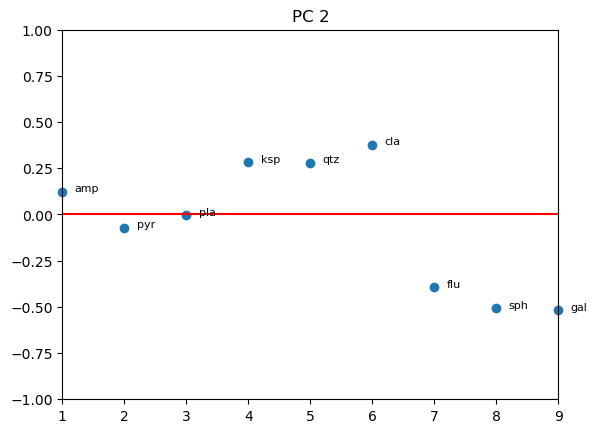

In [19]:
a = np.arange(1,10) # Create a vector with numbers for the variables
plt.figure(2)
plt.plot(a, loadings[:, 1], 'o', clip_on = False) # Plot scatter plot of loadings for each variable.
plt.plot(a, np.zeros(np.size(a)), color = 'red') # Plot a horizontal red line indicating loading of zero
for i, label in enumerate(minerals): # Loop through the variable names (minerals)
    plt.text(a[i] + 0.2, loadings[:, 1][i], label, fontsize = 8) # Plot the names of the variables next to the points
plt.xlim([1, 9]) # Set the limits for the horizontal axis
plt.ylim([-1, 1]) # Set the limits for the vertical axis
plt.title('PC 2') # Set the plot title

**Question 8:** Which variables load strongly on principle component 2?

**Answer 8:** Principle component 2 is highly loaded by fluorite, sphalerite and galenite

**Question 9:** What might principle component 2 represent?

**Answer 9:**  It is almost certain that it represents the hydrothermal vain.

Now we will make a cross plot of the loadings of the first two principle components:

Text(0, 0.5, 'PC2 loadings')

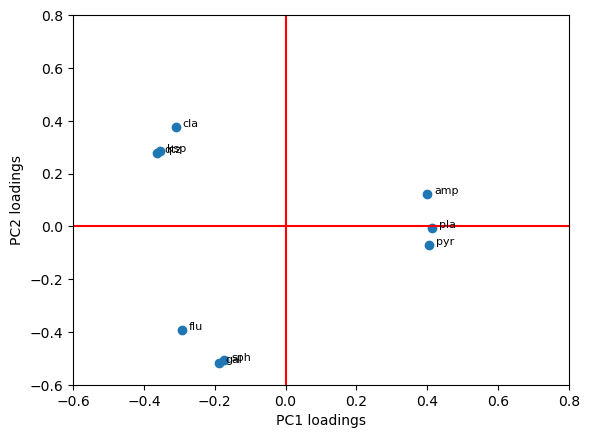

In [20]:
plt.figure(4)
plt.scatter(loadings[:, 0], loadings[:, 1]) # Plot loadings of PC1 vs PC2
plt.xlim([-0.6, 0.8]) # Set horizontal axis limits
plt.ylim([-0.6, 0.8]) # Set vertical axis limits
plt.axhline(color = 'r') # Create red horizontal line for y = 0
plt.axvline(color = 'r') # Create red vertical line for x = 0
for i, label in enumerate(minerals):
    plt.text(loadings[:, 0][i] + 0.02, loadings[:, 1][i], label, fontsize = 8) # Label the variables
plt.xlabel('PC1 loadings') # Provide label for horizontal axis
plt.ylabel('PC2 loadings') # Provide label for vertical axis

**Question 10:** What can we learn from this scatterplot? Does the result surprise you after what you have learned in Lab03 and from your correlation matrix?

**Answer 10:** It shows that the variables group together in three groups based on their loadings on PC1 and PC2. It suggests that these are three main variables in the data. It is not very surprising since these are the three dominant rock types (magmatic, hydrothermal and sandstone)

We can also make a scatter plot of the *scores* of the samples (observations) for PC1 and PC2 instead of the *loadings*. The `scores` variable gives the principal component *scores* for all samples.

**Exercise 6:** Try to make this scores scatterplot yourself for PC1 vs PC2.

*Tip*: You can recycle much of the code used for the crossplot above, but be careful with the labels you use for the plot and the limits of your axes.

Text(0, 0.5, 'PC2 scores')

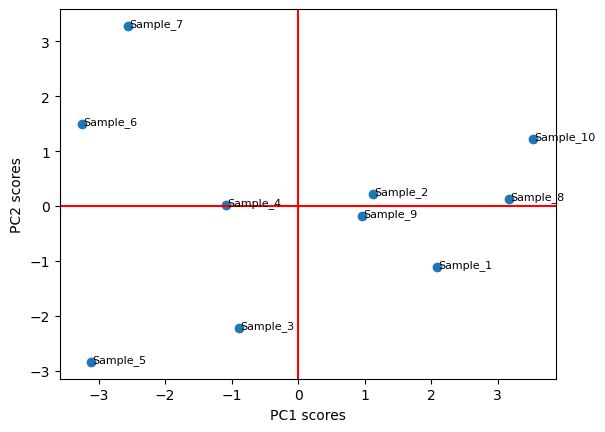

In [ ]:
sample = ['Sample_'+ str(i + 1) for i in range(10)] # Create a vector of sample names
plt.figure(5)
plt.scatter(scores[:, 0], scores[:, 1]) # Plot scores of PC1 vs PC2
plt.axhline(color = 'r') # Create red horizontal line for y = 0
plt.axvline(color = 'r') # Create red vertical line for x = 0
for i, label in enumerate(sample):
    plt.text(scores[:, 0][i] + 0.02, scores[:, 1][i], label, fontsize = 8) # Label the variables
plt.xlabel('PC1 scores') # Provide label for horizontal axis
plt.ylabel('PC2 scores') # Provide label for vertical axis

**Question 11:** What does this plot tell you about the different samples, especially if you compare it to the loadings crossplot?

**Answer 11:** It gives you information how the samples "score" for the two first principle components. In combination with the plot above it tells you which of the groups (rock types) is most represented in each sample.

So far, we have only looked at the first two principle components, but there are more. In fact, a PCA always initially yields a number of components equal to the number of variables in the dataset. However, the amount of variance in the dataset that is explained by a component decreases down the list. To keep track of how much variance each component explains (and therefore how important it is), we can calculate the *eigenvalues* of the components. We do this by dividing the variance explained by each component by the total amount of variance in the dataset, and we multiply by 100% to make the numbers easier to interpret:

In [26]:
percent_explained = 100 * pca.explained_variance_ / np.sum(pca.explained_variance_)
print(percent_explained)

[6.43424711e+01 3.18689141e+01 1.92594142e+00 8.46592572e-01
 5.59432213e-01 2.65771983e-01 1.65102883e-01 2.57737238e-02
 4.73715172e-11]


To make this result easy to interpret, we can plot these eigenvalues in a scatterplot. The code below should be quite familiar to you now.

Text(0.5, 1.0, 'Eigenvalues per component')

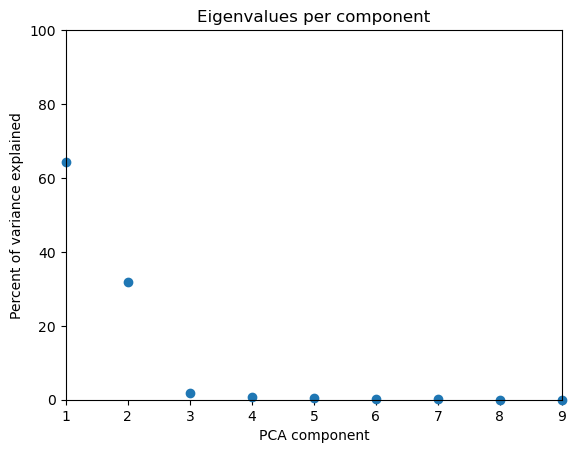

In [27]:
a = np.arange(1, 10) # Create a vector with numbers for the components
plt.figure(6)
plt.plot(a, percent_explained, 'o', clip_on = False) # Plot scatter plot of eigenvalues for each component.
plt.xlim([1, 9]) # Set the limits for the horizontal axis
plt.ylim([0, 100]) # Set the limits for the vertical axis
plt.xlabel('PCA component') # Provide label for horizontal axis
plt.ylabel('Percent of variance explained') # Provide label for vertical axis
plt.title('Eigenvalues per component') # Set the plot title

Since the entire goal of factor analysis is to **reduce** the data, we want to get rid of those principle components that explain (almost) no variance and only keep the components that are important enough.

**Question 12:** Where would you draw the line? How many components would you keep? And why?

**Answer 12:** This decision is slightly subjective, but it is probably save to keep only the first two components. PC3 only explains 0.8% of the variance and the other ones even less, so we do not lose much information that way. In addition, the cross plots show that these two components are enough to give us a clear grouping of the data, which is what we want for this dataset.